# Goal

### Showing the risk of blinding in relation between Age - Gender - race  and Risk Factors
### with the timeline from 2014-> 2017

### Showing different Category of blinding in relation between Age - Gender - race  and Risk Factors
### with the timeline from 2014-> 2017

To begin with, we read the data with the Libary "pandas".

we can see that there are way to many useless data to make a clear picture for the Goal we settled on.

In [32]:



import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.pylabtools import figsize

df = pd.read_csv('MedicalDatasetVision.csv')

print(df)



       YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
0           2016     2017           US     National       NHIS   
1           2016     2017           US     National       NHIS   
2           2016     2017           US     National       NHIS   
3           2016     2017           US     National       NHIS   
4           2016     2017           US     National       NHIS   
...          ...      ...          ...          ...        ...   
71644       2016     2017           US     National       NHIS   
71645       2016     2017           US     National       NHIS   
71646       2016     2017           US     National       NHIS   
71647       2016     2017           US     National       NHIS   
71648       2016     2017           US     National       NHIS   

                     Topic          Category  \
0      Service Utilization  Cataract Surgery   
1      Service Utilization  Cataract Surgery   
2      Service Utilization    Eye Protection   
3      Service 

Step 1.
Removing unnecessary Colums.

In [33]:
df = df.drop(["Numerator","Data_Value_Footnote","Data_Value_Footnote_Symbol","LocationID","DataValueTypeID","GeoLocation","Geographic Level"],axis=1)

print(df)

       YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
0           2016     2017           US     National       NHIS   
1           2016     2017           US     National       NHIS   
2           2016     2017           US     National       NHIS   
3           2016     2017           US     National       NHIS   
4           2016     2017           US     National       NHIS   
...          ...      ...          ...          ...        ...   
71644       2016     2017           US     National       NHIS   
71645       2016     2017           US     National       NHIS   
71646       2016     2017           US     National       NHIS   
71647       2016     2017           US     National       NHIS   
71648       2016     2017           US     National       NHIS   

                     Topic          Category  \
0      Service Utilization  Cataract Surgery   
1      Service Utilization  Cataract Surgery   
2      Service Utilization    Eye Protection   
3      Service 

### Now that we have cleared every useless colums, we define our rule of the Age range. We only want data that shows a ***range*** of data and not a `[AGE] and above` or `All ages` to make a clear statistic using the ranges that are provided

In [34]:
#https://stackoverflow.com/questions/14661701/how-to-drop-a-list-of-rows-from-pandas-dataframe

ind_drop = df[df['Age'].apply(lambda x: x.startswith('All ages'))].index

df = df.drop(ind_drop)
ind_drop = df[df['Age'].apply(lambda x: x.startswith('85 years and older'))].index
df = df.drop(ind_drop)
ind_drop = df[df['Age'].apply(lambda x: x.startswith('18 years and older'))].index
df = df.drop(ind_drop)
ind_drop = df[df['RiskFactor'].apply(lambda x: x.startswith('All participants'))].index
df = df.drop(ind_drop)
ind_drop = df[df['Gender'].apply(lambda x: x.startswith('All genders'))].index
df = df.drop(ind_drop)
df.dropna(subset=['Sample_Size'], inplace=True)

df['Sample_Size'] = df['Sample_Size'].astype(int)

df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Category,Question,Response,Age,...,Sample_Size,TopicID,CategoryID,QuestionID,ResponseID,AgeID,GenderID,RaceEthnicityID,RiskFactorID,RiskFactorResponseID
3,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Don't Know,40-64 years,...,398,TUTL,CPROT,ISPROT,RDK,AGE4064,GM,ALLRACE,RFDM,RFYES
4,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Some of the time,18-39 years,...,174,TUTL,CPROT,ISPROT,RSOMT,AGE1839,GM,ASN,RFDM,RFNO
5,2016,2017,US,National,NHIS,Service Utilization,Eye Protection,Proportion of adults who participate in activi...,Always,18-39 years,...,174,TUTL,CPROT,ISPROT,RALW,AGE1839,GM,ASN,RFDM,RFNO
7,2016,2017,US,National,NHIS,Visual Function,Blind or Difficulty Seeing,Percentage of adults who are blind or unable t...,Yes,18-39 years,...,587,TVFUNC,CBLIND,ISBLA,RYES,AGE1839,GF,ASN,RFHT,RFNO
10,2016,2017,US,National,NHIS,Visual Function,Difficulty Finding Objects,Percentage of adults who even when wearing gla...,Refused,40-64 years,...,7930,TVFUNC,CFUNC,ISFS5,RRF,AGE4064,GF,WHT,RFDM,RFNO


## after cleaning we check for duplicated cases

In [35]:
df.duplicated().sum()

np.int64(0)

## showing all question inside the csv

In [36]:
len(df['Question'].unique())

df['Age'].unique()

array(['40-64 years', '18-39 years', '65-84 years'], dtype=object)

## After cleaning our Data we start with visualisation of the relation between the age and Sample size (the sample size are the participant in this surver)

([<matplotlib.patches.Wedge at 0x22092674980>,
 [Text(0.5371296147902099, 0.9599436321552015, '18-39 years'),
  Text(-1.0473423491513545, -0.33626478209012994, '40-64 years'),
  Text(0.804867182674965, -0.7497925168023917, '65-84 years')],
 [Text(0.29297978988556905, 0.5236056175392008, '33.8%'),
  Text(-0.5712776449916478, -0.18341715386734359, '42.4%'),
  Text(0.43901846327725363, -0.40897773643766816, '23.9%')])

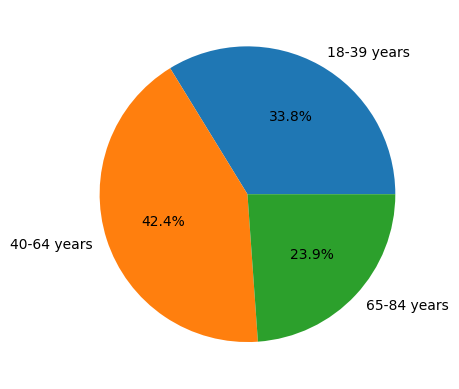

In [37]:
arange = ['18-39 years','40-64 years','65-84 years']
procentual_distribution = []
aged_classed_participant = {age: { 'participant': df[df['Age'] == age]['Sample_Size'].sum()} for age in arange}

all_particpant = df['Sample_Size'].sum()

participant_percentage = {age: (aged_classed_participant.get(age).get('participant') / all_particpant) *100 for age in arange}
    
plt.pie(participant_percentage.values(),labels=participant_percentage.keys() ,autopct='%1.1f%%')
    


## Now we Visualize the amount of Females and Males into a Pie

([<matplotlib.patches.Wedge at 0x220926c7440>,
 [Text(0.1350867453775378, 1.0916737476111187, 'Male'),
  Text(-0.13508678007803573, -1.091673743317182, 'Female')],
 [Text(0.07368367929683879, 0.5954584077878828, '46.1%'),
  Text(-0.07368369822438313, -0.5954584054457356, '53.9%')])

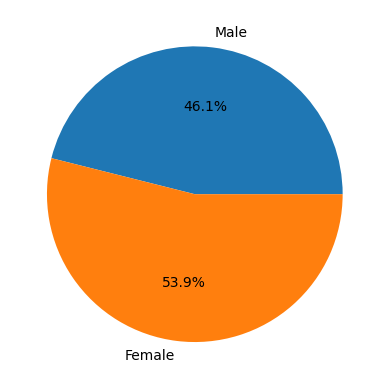

In [38]:
genders = ['Male', 'Female']

genderClassedDistribution = {gender: {'amount': df[df['Gender'] == gender]['Sample_Size'].sum() } for gender in genders}

allGenderAmount = df['Sample_Size'].sum()

genderPercentage = {gender: (genderClassedDistribution.get(gender).get('amount') / all_particpant) *100 for gender in genders}

plt.pie(genderPercentage.values(),labels=genderPercentage.keys() ,autopct='%1.1f%%')


### Visualisation of Male and Female Riskfaktors

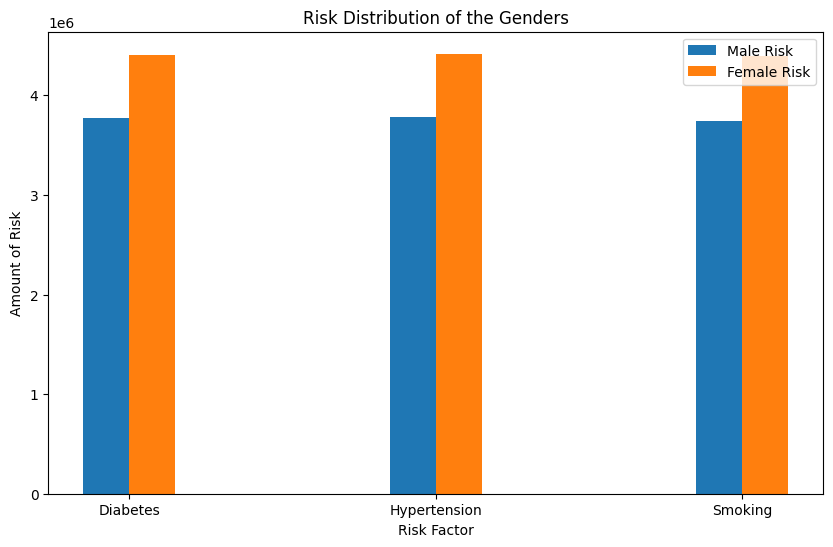

In [39]:
import numpy as np

riskFactors = df['RiskFactor'].unique()
riskAnswer = df['RiskFactorResponse'].unique()

maleRiskFactors = {risk:  df[(df['Gender'] == 'Male') & (df['RiskFactor'] == risk)]['Sample_Size'].sum()  for risk in riskFactors}
femaleRiskFactors = {risk:  df[(df['Gender'] == 'Female') & (df['RiskFactor'] == risk)]['Sample_Size'].sum() for risk in riskFactors}
maleFullAmountOfRisk = 0
femaleFullAmountOfRisk = 0


bar_width = 0.15
r1 = np.arange(len(riskFactors))
r2 = [x + bar_width for x in r1]



fig, ax  = plt.subplots(figsize=(10, 6))
ax.bar(r1, maleRiskFactors.values(),width=bar_width, label='Male Risk')
ax.bar(r2, femaleRiskFactors.values(),width=bar_width, label='Female Risk')
ax.set_xticks(([r + (bar_width / 2)  for r in range(len(riskFactors))]))
ax.set_xticklabels(riskFactors)
ax.set_title('Risk Distribution of the Genders')
ax.set_xlabel('Risk Factor')
ax.set_ylabel('Amount of Risk')
ax.legend()




plt.show()

Sperating them to year and Riskfactors

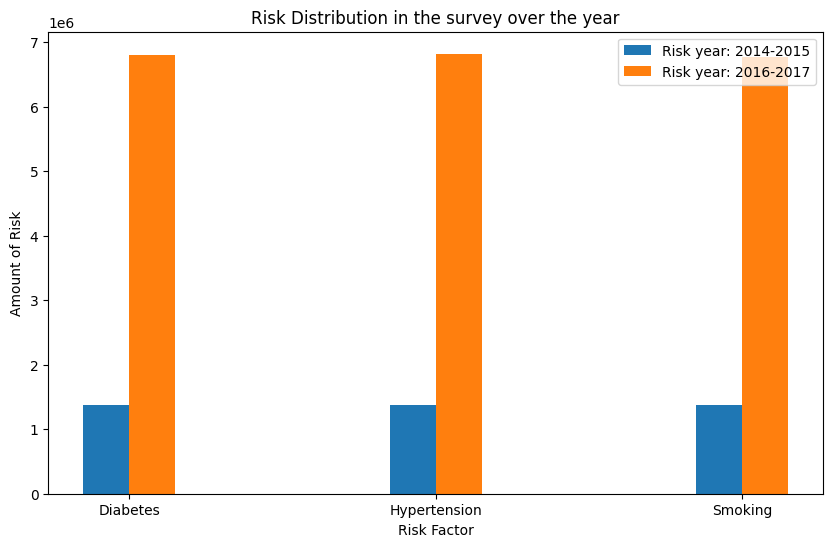

In [40]:
import numpy as np

yearRange = df['YearStart'].unique()


yearRisk2014 = {risk:  df[(df['RiskFactor'] == risk) & (df['YearStart'] == 2014)]['Sample_Size'].sum()  for risk in riskFactors}
yearRisk2016 = {risk:  df[ (df['RiskFactor'] == risk) & (df['YearStart'] == 2016)]['Sample_Size'].sum() for risk in riskFactors}



bar_width = 0.15
r1 = np.arange(len(riskFactors))#
r2 = [x + bar_width for x in r1]#


fig, ax  = plt.subplots(figsize=(10, 6))
ax.bar(r1, yearRisk2014.values(),width=bar_width, label='Risk year: 2014-2015')
ax.bar(r2, yearRisk2016.values(),width=bar_width, label='Risk year: 2016-2017')
ax.set_xticks(([r + (bar_width / 2)  for r in range(len(riskFactors))]))
ax.set_xticklabels(riskFactors)
ax.set_title('Risk Distribution in the survey over the year')
ax.set_xlabel('Risk Factor')
ax.set_ylabel('Amount of Risk')
ax.legend()




plt.show()

As we can see, the statistic shows that the risks in the survey has increased drastically
now, how about the distrubution about the Male and Female ove the year?

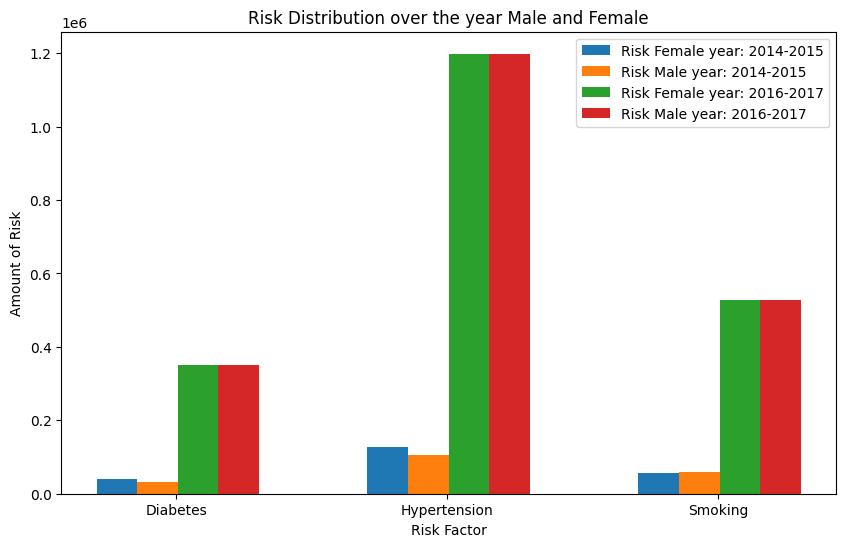

In [51]:

# Getting all the data out of the Dataframe
yearRiskFemale2014 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2014) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskMale2014 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2014) & (df['Gender'] == 'Male')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskFemale2016 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2016) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}
yearRiskMale2016 = {risk:  df[(df['RiskFactor'] == risk) & ((df['RiskFactorResponse'] == 'Yes') | (df['RiskFactorResponse'] == 'Current smoker' )) & (df['YearStart'] == 2016) & (df['Gender'] == 'Female')]['Sample_Size'].sum()  for risk in riskFactors}

#Building the Bar char


bar_width = 0.15
r1 = np.arange(len(riskFactors))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

fig, ax  = plt.subplots(figsize=(10, 6))
ax.bar(r1, yearRiskFemale2014.values(),width=bar_width, label='Risk Female year: 2014-2015')
ax.bar(r2, yearRiskMale2014.values(),width=bar_width, label='Risk Male year: 2014-2015')
ax.bar(r3, yearRiskFemale2016.values(),width=bar_width, label='Risk Female year: 2016-2017')
ax.bar(r4, yearRiskMale2016.values(),width=bar_width, label='Risk Male year: 2016-2017')
ax.set_xticks(([r + (bar_width + 0.07)  for r in range(len(riskFactors))]))
ax.set_xticklabels(riskFactors)
ax.set_title('Risk Distribution over the year Male and Female')
ax.set_xlabel('Risk Factor')
ax.set_ylabel('Amount of Risk')
ax.legend()



Lets take a closer look into the smoking part, since it has some strange behavior 

In [42]:
# Seeing what possible answer are there regarding to smoking

df['RiskFactorResponse'].unique()
#As we can see there is only 'Current smoker','Never smoker','Former smoker' as a possible answer...

array(['Yes', 'No', 'Former smoker', 'Never smoker', 'Total',
       'Borderline', 'Current smoker'], dtype=object)

### Now that we have cleared what kind of a answer are there we gonna work with the smoking part.

([<matplotlib.patches.Wedge at 0x2208ef06ff0>,
 [Text(1.0516957584309343, 0.3223911160351383, '2014'),
  Text(-1.0516957590706186, -0.32239111394837716, '2016')],
 [Text(0.5736522318714187, 0.17584969965553, '9.5%'),
  Text(-0.5736522322203373, -0.17584969851729662, '90.5%')])

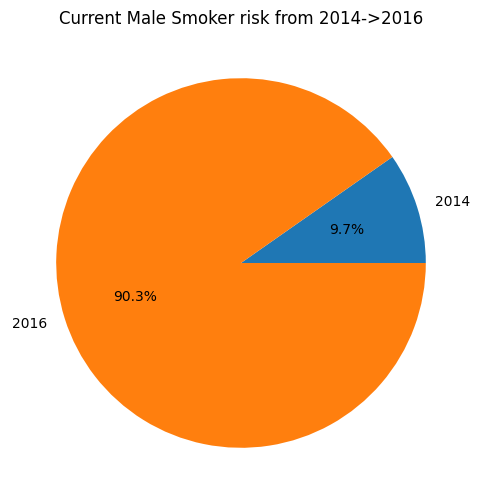

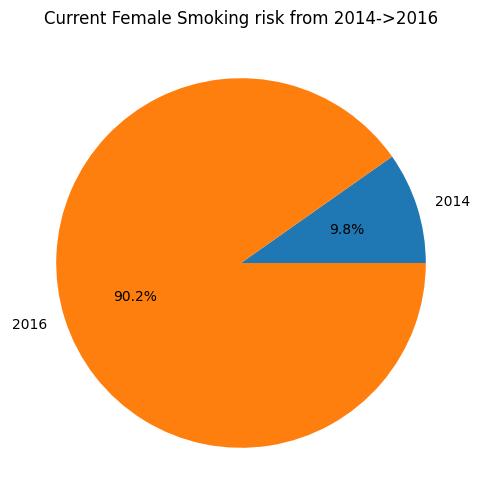

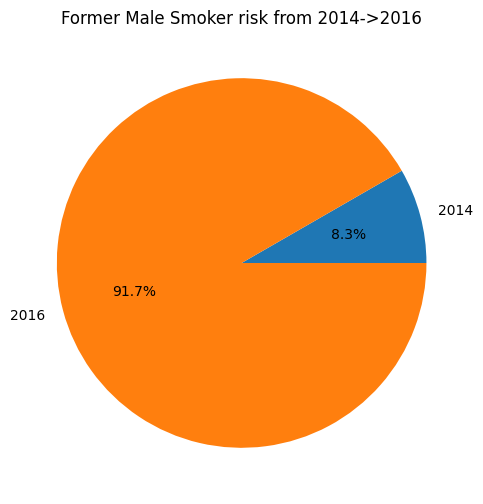

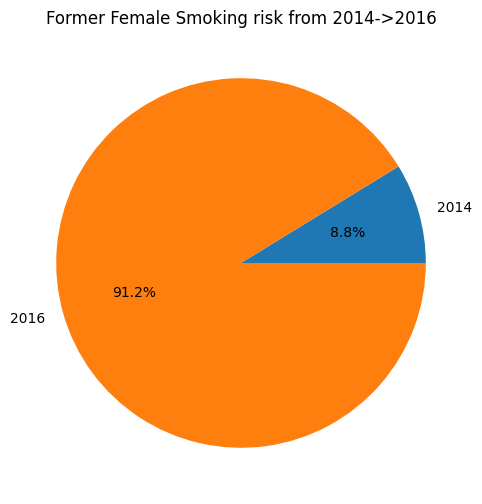

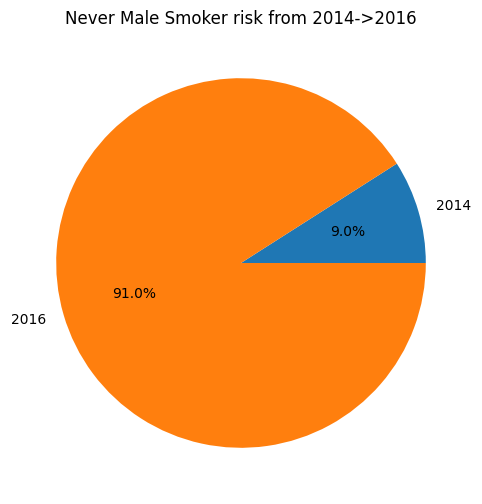

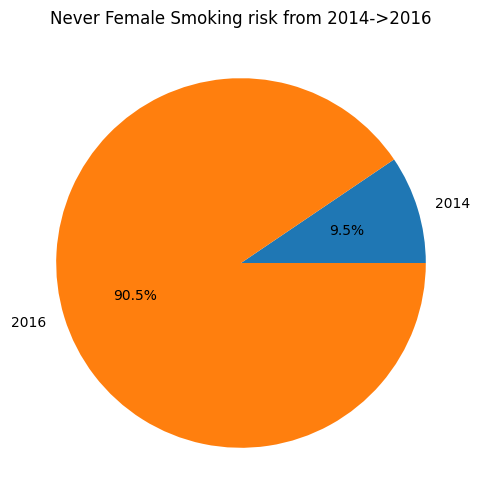

In [49]:
smokingAnswers = ['Current smoker','Never smoker','Former smoker']

smokerTypeMaleYear2014 = { smokingAnswer: df[(df['YearStart'] == 2014) & (df['Gender'] == 'Male') & (df['RiskFactorResponse'] == smokingAnswer)]['Sample_Size'].sum()  for smokingAnswer in smokingAnswers}

smokerTypeFemaleYear2014 = { smokingAnswer: df[(df['YearStart'] == 2014) & (df['Gender'] == 'Female') & (df['RiskFactorResponse'] == smokingAnswer)]['Sample_Size'].sum() for year in yearRange  for smokingAnswer in smokingAnswers}

smokerTypeMaleYear2016 = { smokingAnswer: df[(df['YearStart'] == 2016) & (df['Gender'] == 'Male') & (df['RiskFactorResponse'] == smokingAnswer)]['Sample_Size'].sum() for year in yearRange  for smokingAnswer in smokingAnswers}

smokerTypeFemaleYear2016 = { smokingAnswer: df[(df['YearStart'] == 2016) & (df['Gender'] == 'Female') & (df['RiskFactorResponse'] == smokingAnswer)]['Sample_Size'].sum() for smokingAnswer in smokingAnswers}

allParticipantMaleCurrentSmoker =  df[ (df['RiskFactorResponse'] == 'Current smoker') & (df['Gender'] == 'Male')]['Sample_Size'].sum()  
allParticipantFemaleCurrentSmoker =  df[(df['RiskFactorResponse'] == 'Current smoker') & (df['Gender'] == 'Female')]['Sample_Size'].sum()

allParticipantMaleNeverSmoker =  df[(df['RiskFactorResponse'] == 'Never smoker') & (df['Gender'] == 'Male')]['Sample_Size'].sum()  
allParticipantFemaleNeverSmoker =  df[(df['RiskFactorResponse'] == 'Never smoker') & (df['Gender'] == 'Female')]['Sample_Size'].sum()

allParticipantMaleFormerSmoker =  df[(df['RiskFactorResponse'] == 'Former smoker') & (df['Gender'] == 'Male')]['Sample_Size'].sum()  
allParticipantFemaleFormerSmoker =  df[(df['RiskFactorResponse'] == 'Former smoker') & (df['Gender'] == 'Female')]['Sample_Size'].sum()



malePercentageNeverSmoker2014 = ( (smokerTypeMaleYear2014.get('Never smoker') / allParticipantMaleNeverSmoker) * 100)
malePercentageNeverSmoker2016 = ( (smokerTypeMaleYear2016.get('Never smoker') / allParticipantMaleNeverSmoker) * 100)

femalePercentageNeverSmoker2014 = ( (smokerTypeFemaleYear2014.get('Never smoker') / allParticipantFemaleNeverSmoker) * 100)
femalePercentageNeverSmoker2016 = ( (smokerTypeFemaleYear2016.get('Never smoker') / allParticipantFemaleNeverSmoker) * 100)

malePercentageCurrentSmoker2014 = ( (smokerTypeMaleYear2014.get('Current smoker') / allParticipantMaleCurrentSmoker) * 100)
malePercentageCurrentSmoker2016 = ( (smokerTypeMaleYear2016.get('Current smoker') / allParticipantMaleCurrentSmoker) * 100)

femalePercentageCurrentSmoker2014 = ( (smokerTypeFemaleYear2014.get('Current smoker') / allParticipantFemaleCurrentSmoker) * 100)
femalePercentageCurrentSmoker2016 = ( (smokerTypeFemaleYear2016.get('Current smoker') / allParticipantFemaleCurrentSmoker) * 100)

malePercentageFormerSmoker2014 = ( (smokerTypeMaleYear2014.get('Former smoker') / allParticipantMaleFormerSmoker) * 100)
malePercentageFormerSmoker2016 = ( (smokerTypeMaleYear2016.get('Former smoker') / allParticipantMaleFormerSmoker) * 100)

femalePercentageFormerSmoker2014 = ( (smokerTypeFemaleYear2014.get('Former smoker') / allParticipantFemaleFormerSmoker) * 100)
femalePercentageFormerSmoker2016 = ( (smokerTypeFemaleYear2016.get('Former smoker') / allParticipantFemaleFormerSmoker) * 100)

maleCurrentSmokerPieValues = [
    malePercentageCurrentSmoker2014,
    malePercentageCurrentSmoker2016
]

femaleCurrentSmokerPieValues = [
    femalePercentageCurrentSmoker2014,
    femalePercentageCurrentSmoker2016
]

maleNeverSmokerPieValues = [
    malePercentageNeverSmoker2014,
    malePercentageNeverSmoker2016
]

femaleNeverSmokerPieValues = [
    femalePercentageNeverSmoker2014,
    femalePercentageNeverSmoker2016
]

maleFormerSmokerPieValues = [
    malePercentageFormerSmoker2014,
    malePercentageFormerSmoker2016
]

femaleFormerSmokerPieValues = [
    femalePercentageFormerSmoker2014,
    femalePercentageFormerSmoker2016
]

labelArray = ['2014','2016']

#
fig, maleCurrentSmokerPie  = plt.subplots(figsize=(10, 6))
fig, femaCurrentSmokerlePie = plt.subplots(figsize=(10, 6))
maleCurrentSmokerPie.set_title('Current Male Smoker risk from 2014->2016')
femaCurrentSmokerlePie.set_title('Current Female Smoking risk from 2014->2016')

maleCurrentSmokerPie.pie(maleCurrentSmokerPieValues,labels=labelArray ,autopct='%1.1f%%')
femaCurrentSmokerlePie.pie(femaleCurrentSmokerPieValues, labels=labelArray, autopct='%1.1f%%')

fig, maleFormerSmokerPie  = plt.subplots(figsize=(10, 6))
fig, femaFormerSmokerPie = plt.subplots(figsize=(10, 6))
maleFormerSmokerPie.set_title('Former Male Smoker risk from 2014->2016')
femaFormerSmokerPie.set_title('Former Female Smoking risk from 2014->2016')

maleFormerSmokerPie.pie(maleFormerSmokerPieValues,labels=labelArray ,autopct='%1.1f%%')
femaFormerSmokerPie.pie(femaleFormerSmokerPieValues, labels=labelArray, autopct='%1.1f%%')

fig, maleNeverSmokerPie  = plt.subplots(figsize=(10, 6))
fig, femaNeverSmokerlePie = plt.subplots(figsize=(10, 6))
maleNeverSmokerPie.set_title('Never Male Smoker risk from 2014->2016')
femaNeverSmokerlePie.set_title('Never Female Smoking risk from 2014->2016')

maleNeverSmokerPie.pie(maleNeverSmokerPieValues,labels=labelArray ,autopct='%1.1f%%')
femaNeverSmokerlePie.pie(femaleNeverSmokerPieValues, labels=labelArray, autopct='%1.1f%%')


### Now that we have determint what the differences is, we conclude that the amount of people having the same risk caused by smoking did not changed rapidly we can clearly say that Smoking is a stable information.